In [36]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

# Initialize folders, read in data

In [2]:
# Initialize WD
root_folder = "/cjc/miel/martin/WLMT-recapitulation"
results_folder = f"{root_folder}/data/results/results_10102023"
# results_folder = f"{root_folder}/data/results/results_10122023"

In [26]:
# Read in metadata
petkovich_meta = pd.read_excel(f"{root_folder}/sample_meta_NIHMS863021-supplement-2.xlsx", header=3)
gsm_meta = pd.read_csv(f"{root_folder}/metamatch.txt", header=None)
gsm_meta.columns = ["Sample Name", "Sample"]
sra_table = pd.read_csv(f"{root_folder}/SraRunTable-2.txt")
nih_meta = pd.merge(gsm_meta, sra_table, on="Sample Name", how="inner").rename(columns={"Sample":"Sample Name", "Sample Name":"GEO_Accession"})
all_meta = pd.merge(nih_meta, petkovich_meta, on="Sample Name", how="inner")
all_meta.columns = all_meta.columns.str.lower()
all_meta["age_days"] = all_meta["age"].astype(float) * 30
all_meta.to_csv(f"{root_folder}/all_meta.csv", index=False)
all_meta

,geo_accession,sample name,run,assay type,avgspotlen,bases,bioproject,biosample,bytes,center name,...,strain,tissue,geo_accession (exp),strain/condition,age,sex,aligned pe reads,prepared for sequencing,used in subset 1/2,age_days
0,GSM2132712,20D02,SRR3440565,Bisulfite-Seq,150,5077961400,PRJNA319643,SAMN04902251,2535396174,GEO,...,C57BL/6,whole blood,GSM2132712,C57BL/6_NIA/BWH,0.67,Male,22860348,D.A. Petkovich,NaN,20.1
1,GSM2132713,20D03,SRR3440566,Bisulfite-Seq,150,5574276150,PRJNA319643,SAMN04902252,2777080295,GEO,...,C57BL/6,whole blood,GSM2132713,C57BL/6_NIA/BWH,0.67,Male,24139755,D.A. Petkovich,NaN,20.1
2,GSM2132714,20D04,SRR3440567,Bisulfite-Seq,150,5852789850,PRJNA319643,SAMN04902253,2925011299,GEO,...,C57BL/6,whole blood,GSM2132714,C57BL/6_NIA/BWH,0.67,Male,26017532,D.A. Petkovich,NaN,20.1
3,GSM2132715,20D05,SRR3440568,Bisulfite-Seq,150,6069354450,PRJNA319643,SAMN04902254,3030737146,GEO,...,C57BL/6,whole blood,GSM2132715,C57BL/6_NIA/BWH,0.67,Male,26465141,D.A. Petkovich,NaN,20.1
4,GSM2132716,20D06,SRR3440569,Bisulfite-Seq,150,5059694850,PRJNA319643,SAMN04902255,2504613920,GEO,...,C57BL/6,whole blood,GSM2132716,C57BL/6_NIA/BWH,0.67,Male,22587003,D.A. Petkovich,NaN,20.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,GSM2132958,M3502R,SRR3440928,Bisulfite-Seq,150,996221550,PRJNA319643,SAMN04902315,447043487,GEO,...,C57BL/6,whole blood,GSM2132958,C57BL/6,35,Male,15911915,D.A. Petkovich,1.0,1050.0
250,GSM2132958,M3502R,SRR3440929,Bisulfite-Seq,150,2380795500,PRJNA319643,SAMN04902315,997426868,GEO,...,C57BL/6,whole blood,GSM2132958,C57BL/6,35,Male,15911915,D.A. Petkovich,1.0,1050.0
251,GSM2132959,M3503,SRR3440930,Bisulfite-Seq,150,1953852450,PRJNA319643,SAMN04902316,817629463,GEO,...,C57BL/6,whole blood,GSM2132959,C57BL/6,35,Male,21414583,D.A. Petkovich,1.0,1050.0
252,GSM2132959,M3503,SRR3440931,Bisulfite-Seq,150,2852108550,PRJNA319643,SAMN04902316,1324293747,GEO,...,C57BL/6,whole blood,GSM2132959,C57BL/6,35,Male,21414583,D.A. Petkovich,1.0,1050.0


In [33]:
pet_clock = pd.read_excel(f"{root_folder}/clock_weights_NIHMS863021-supplement-4.xlsx", header=3)
pet_clock["chr"] = pet_clock["Chromosome"].str.replace("chr","").astype(int)
pet_clock.rename(columns={"Position":"position"}, inplace=True)
pet_clock["index"] = pet_clock[["chr", "position"]].astype(int).astype(str).apply(lambda x: "_".join(x), axis=1)
pet_clock

,Chromosome,position,UCSC Refgene name,Located within,Relation to CpG Island,Predicted Element,Methylation Age Correlation,Weight,chr,index
0,chr19,23893239,Apba1,CDS,Island,-,Positive,0.013974,19,19_23893239
1,chr19,34746608,Slc16a12,gene,N_Shore,Promoter,Negative,-0.208112,19,19_34746608
2,chr18,45590054,Kcnn2,gene,-,Enhancer,Negative,-0.052283,18,18_45590054
3,chr18,58836612,-,-,Island,Enhancer/Promoter,Positive,0.098457,18,18_58836612
4,chr16,10502211,Ciita,CDS,-,-,Positive,0.228798,16,16_10502211
...,...,...,...,...,...,...,...,...,...,...
85,chr2,74655759,Evx2,CDS,Island,-,Positive,0.006073,2,2_74655759
86,chr1,137182660,-,-,-,-,Negative,-0.075158,1,1_137182660
87,chr1,32172827,Khdrbs2,5'UTR,Island,Promoter,Positive,0.049245,1,1_32172827
88,chr1,55363363,Boll,5'UTR,Island,Promoter,Positive,0.007965,1,1_55363363


In [4]:
# Read in WLMT clock
xlsx = pd.ExcelFile(f"{root_folder}/clock_weights_elife-40675-supp3-v2.xlsx")
meer_clock = pd.read_excel(xlsx, sheet_name="Whole lifespan multi-tissue", header=0).dropna(axis=0, how="any")
meer_clock["chr"] = meer_clock["Chromosome"].str.replace("chr","").astype(int)
meer_clock.rename(columns={"Position":"position"}, inplace=True)
meer_clock["index"] = meer_clock[["chr", "position"]].astype(int).astype(str).apply(lambda x: "_".join(x), axis=1)
meer_clock

,Chromosome,position,Weight,Relation to CpG island,Gene name,Feature,chr,index
0,chr10,111559529.0,0.093680,-,-,-,10,10_111559529
1,chr10,115250413.0,-0.044929,Shore,Tbc1d15,Intron,10,10_115250413
2,chr10,118803606.0,-0.029330,-,-,-,10,10_118803606
3,chr10,121498258.0,-0.021227,-,-,-,10,10_121498258
4,chr10,127620127.0,-0.166235,Shore,Lrp1,Intron,10,10_127620127
...,...,...,...,...,...,...,...,...
430,chr9,57939796.0,-0.005877,Shore,Sema7a,Promoter,9,9_57939796
431,chr9,57939812.0,-0.544827,Shore,Sema7a,Promoter,9,9_57939812
432,chr9,64085222.0,0.106913,Shore,Scarletltr,Intron,9,9_64085222
433,chr9,69812651.0,0.076168,-,B230323A14Rik,Intron,9,9_69812651


In [16]:
import polars as pl
import os
from concurrent.futures import ProcessPoolExecutor, ThreadPoolExecutor, as_completed

files = os.listdir(f"{results_folder}/metlev")
files = [f for f in files if f.endswith("full_autosome.csv.gz")]

def read_csv(file):
    return pl.read_csv(f"{results_folder}/metlev/{file}")

metlev_data=[]
with ThreadPoolExecutor() as executor:
    metlev_data = list(executor.map(read_csv, files))
metlev_data

TypeError: unhashable type: 'DataFrame'

In [5]:
import pandas as pd
import os
from concurrent.futures import ProcessPoolExecutor, ThreadPoolExecutor, as_completed

files = os.listdir(f"{results_folder}/metlev")
files = [f for f in files if f.endswith("full_autosome.csv.gz")]

def read_csv(file):
    return pd.read_csv(f"{results_folder}/metlev/{file}").fillna(0)

metlev_data=[]
with ThreadPoolExecutor() as executor:
    metlev_data = list(executor.map(read_csv, files))
metlev_data

[                     index  SRR3440613_metlev
 0                1_3014929         100.000000
 1                1_3014975         100.000000
 2                1_3020689          88.888889
 3                1_3020690          80.000000
 4                1_3020724         100.000000
 ...                    ...                ...
 2763174  JH584304.1_111439         100.000000
 2763175  JH584304.1_113309         100.000000
 2763176  JH584304.1_113325         100.000000
 2763177  JH584304.1_113484         100.000000
 2763178  JH584304.1_113502         100.000000
 
 [2763179 rows x 2 columns],
                      index  SRR3440930_metlev
 0                1_3020815          78.571429
 1                1_3020843          78.571429
 2                1_3020877          87.500000
 3                1_3020891          76.470588
 4                1_3020892          85.185185
 ...                    ...                ...
 2948473  JH584304.1_113484         100.000000
 2948474  JH584304.1_113502  

In [64]:

clock = meer_clock
def calculate_metage(i):
    mdat = metlev_data[i]
    shared = np.intersect1d(clock["index"].values, mdat["index"].values)
    relevant_data = mdat.set_index("index").loc[shared]
    metage = relevant_data.T.dot(clock.set_index("index").loc[shared, "Weight"]) / np.linalg.norm(meer_clock["Weight"])
    metage = metage.to_frame().reset_index().rename(columns={0:"metage"})
    name = metage["index"].str.split("_", expand=True)[0]
    metage["run"] = name
    return name, metage, shared, len(shared)

names = []
metage = []
shared = []
num_overlap = []
with ProcessPoolExecutor() as executor:
    futures = [executor.submit(calculate_metage, i) for i in np.arange(len(metlev_data))]
    for future in as_completed(futures):
        name, metage_, shared_, num_overlap_ = future.result()
        names.append(name)
        metage.append(metage_)
        shared.append(shared_)
        num_overlap.append(num_overlap_)    
metage = pd.concat(metage, ignore_index=True)
metage

metage_wmeta = pd.merge(all_meta, metage, on="run", how="inner")

Exception ignored in: <function tqdm.__del__ at 0x7fffa0094ef0>
Traceback (most recent call last):
  File "/home/martinak/anaconda3/envs/WLMT/lib/python3.7/site-packages/tqdm/std.py", line 1149, in __del__
    self.close()
  File "/home/martinak/anaconda3/envs/WLMT/lib/python3.7/site-packages/tqdm/notebook.py", line 278, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'


,index,metage,run
0,SRR3440917_metlev,100.366433,SRR3440917
1,SRR3440863_metlev,71.406535,SRR3440863
2,SRR3440791_metlev,11.704626,SRR3440791
3,SRR3440807_metlev,71.838094,SRR3440807
4,SRR3440826_metlev,115.315903,SRR3440826
...,...,...,...
249,SRR3440570_metlev,-61.009064,SRR3440570
250,SRR3440727_metlev,-24.142966,SRR3440727
251,SRR3440844_metlev,131.433685,SRR3440844
252,SRR3440825_metlev,108.798293,SRR3440825


In [92]:
metage_wmeta

,geo_accession,sample name,run,assay type,avgspotlen,bases,bioproject,biosample,bytes,center name,...,geo_accession (exp),strain/condition,age,sex,aligned pe reads,prepared for sequencing,used in subset 1/2,age_days,index,metage
0,GSM2132712,20D02,SRR3440565,Bisulfite-Seq,150,5077961400,PRJNA319643,SAMN04902251,2535396174,GEO,...,GSM2132712,C57BL/6_NIA/BWH,0.67,Male,22860348,D.A. Petkovich,NaN,20.1,SRR3440565_metlev,-47.639775
1,GSM2132713,20D03,SRR3440566,Bisulfite-Seq,150,5574276150,PRJNA319643,SAMN04902252,2777080295,GEO,...,GSM2132713,C57BL/6_NIA/BWH,0.67,Male,24139755,D.A. Petkovich,NaN,20.1,SRR3440566_metlev,-57.917493
2,GSM2132714,20D04,SRR3440567,Bisulfite-Seq,150,5852789850,PRJNA319643,SAMN04902253,2925011299,GEO,...,GSM2132714,C57BL/6_NIA/BWH,0.67,Male,26017532,D.A. Petkovich,NaN,20.1,SRR3440567_metlev,-68.086899
3,GSM2132715,20D05,SRR3440568,Bisulfite-Seq,150,6069354450,PRJNA319643,SAMN04902254,3030737146,GEO,...,GSM2132715,C57BL/6_NIA/BWH,0.67,Male,26465141,D.A. Petkovich,NaN,20.1,SRR3440568_metlev,-50.537556
4,GSM2132716,20D06,SRR3440569,Bisulfite-Seq,150,5059694850,PRJNA319643,SAMN04902255,2504613920,GEO,...,GSM2132716,C57BL/6_NIA/BWH,0.67,Male,22587003,D.A. Petkovich,NaN,20.1,SRR3440569_metlev,-68.799487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,GSM2132958,M3502R,SRR3440928,Bisulfite-Seq,150,996221550,PRJNA319643,SAMN04902315,447043487,GEO,...,GSM2132958,C57BL/6,35,Male,15911915,D.A. Petkovich,1.0,1050.0,SRR3440928_metlev,185.490488
250,GSM2132958,M3502R,SRR3440929,Bisulfite-Seq,150,2380795500,PRJNA319643,SAMN04902315,997426868,GEO,...,GSM2132958,C57BL/6,35,Male,15911915,D.A. Petkovich,1.0,1050.0,SRR3440929_metlev,211.854425
251,GSM2132959,M3503,SRR3440930,Bisulfite-Seq,150,1953852450,PRJNA319643,SAMN04902316,817629463,GEO,...,GSM2132959,C57BL/6,35,Male,21414583,D.A. Petkovich,1.0,1050.0,SRR3440930_metlev,214.887088
252,GSM2132959,M3503,SRR3440931,Bisulfite-Seq,150,2852108550,PRJNA319643,SAMN04902316,1324293747,GEO,...,GSM2132959,C57BL/6,35,Male,21414583,D.A. Petkovich,1.0,1050.0,SRR3440931_metlev,215.612637


In [93]:
metlev_data

[                     index  SRR3440613_metlev
 0                1_3014929         100.000000
 1                1_3014975         100.000000
 2                1_3020689          88.888889
 3                1_3020690          80.000000
 4                1_3020724         100.000000
 ...                    ...                ...
 2763174  JH584304.1_111439         100.000000
 2763175  JH584304.1_113309         100.000000
 2763176  JH584304.1_113325         100.000000
 2763177  JH584304.1_113484         100.000000
 2763178  JH584304.1_113502         100.000000
 
 [2763179 rows x 2 columns],
                      index  SRR3440930_metlev
 0                1_3020815          78.571429
 1                1_3020843          78.571429
 2                1_3020877          87.500000
 3                1_3020891          76.470588
 4                1_3020892          85.185185
 ...                    ...                ...
 2948473  JH584304.1_113484         100.000000
 2948474  JH584304.1_113502  

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca_data = metlev_data.set_index("index")
prop_nan = pca_data.isna().sum(axis=0) / pca_data.shape[0]
pca_data = pca_data.loc[:, prop_nan < 0.1]
pca_data.fillna(0, inplace=True)
# Perform PCA on metcov_data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_data.T)
pca = PCA(n_components=pca_data.shape[1])
pca_result = pca.fit_transform(scaled_data)


In [17]:
metage["metage"] = metage["metage"] - metage["metage"].min()

In [ ]:
# Read in metcov data
metlev_data = pd.read_csv(f"{results_folder}/metlev/metlev_full_autosome.csv.gz")
# metlev_data = pd.read_csv(f"{results_folder}/metlev/metlev_selected_sites.csv.gz")
metlev_data

,index,SRR3440613_metlev,SRR3440930_metlev,SRR3440795_metlev,SRR3440917_metlev,SRR3440793_metlev,SRR3440837_metlev,SRR3440879_metlev,SRR3440607_metlev,SRR3440847_metlev,...,SRR3440774_metlev,SRR3440772_metlev,SRR3440820_metlev,SRR3440784_metlev,SRR3440619_metlev,SRR3440865_metlev,SRR3440871_metlev,SRR3440907_metlev,SRR3440576_metlev,SRR3440569_metlev
0,1_3037802,100.000000,100.000000,93.939394,100.000000,100.000000,100.000000,83.333333,100.000000,93.103448,...,100.000000,100.000000,100.000000,100.000000,90.000000,100.000000,100.000000,73.684211,93.478261,81.250000
1,1_3037820,75.000000,37.500000,87.878788,100.000000,86.956522,70.000000,75.000000,100.000000,72.413793,...,90.909091,95.833333,100.000000,100.000000,70.000000,71.428571,72.727273,68.421053,76.595745,81.250000
2,1_3037825,100.000000,87.500000,100.000000,100.000000,91.304348,100.000000,66.666667,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,90.000000,95.000000,100.000000,100.000000,89.361702,100.000000
3,1_3037827,50.000000,81.250000,87.878788,0.000000,65.217391,60.000000,58.333333,62.500000,58.620690,...,86.363636,76.000000,92.857143,91.666667,90.000000,47.619048,81.818182,52.631579,82.978723,81.250000
4,1_3037845,100.000000,100.000000,96.969697,100.000000,100.000000,100.000000,66.666667,100.000000,100.000000,...,100.000000,84.000000,100.000000,100.000000,80.000000,95.238095,90.909091,89.473684,93.617021,93.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216574,JH584304.1_59659,13.260341,24.707412,24.722041,14.285714,31.491003,28.726877,23.463687,21.345408,24.450402,...,24.558081,20.948379,25.543478,35.035035,19.174041,31.352459,31.545338,23.855165,20.981595,23.471171
216575,JH584304.1_59678,19.756839,29.718876,33.333333,30.000000,44.651952,38.414634,35.204082,32.484076,33.283804,...,37.560193,33.519553,36.046512,46.282974,26.086957,41.007194,39.200000,37.651822,33.839150,32.786885
216576,JH584304.1_59707,11.818182,18.253968,20.955316,20.000000,29.371817,28.353659,25.380711,20.952381,24.332344,...,25.641026,20.670391,25.581395,33.573141,20.000000,32.374101,21.513944,25.910931,22.761760,25.220681
216577,JH584304.1_59708,15.960912,25.128205,26.704545,18.181818,31.991952,25.819672,22.900763,19.926199,27.224199,...,27.133106,21.746575,28.048780,36.363636,18.947368,29.372937,32.307692,24.878049,32.743363,30.684932


In [ ]:
# Read in metcov data
metlev_data = pd.read_csv(f"{results_folder}/metcov_selected_sites/all_sites_methylation2.csv.gz")
metlev_data

,index,SRR3440613_metlev,SRR3440930_metlev,SRR3440795_metlev,SRR3440565_metlev,SRR3440793_metlev,SRR3440837_metlev,SRR3440879_metlev,SRR3440607_metlev,SRR3440917_metlev,...,SRR3440619_metlev,SRR3440774_metlev,SRR3440821_metlev,SRR3440865_metlev,SRR3440784_metlev,SRR3440907_metlev,SRR3440836_metlev,SRR3440576_metlev,SRR3440871_metlev,SRR3440569_metlev
0,1_3014929,100.000000,NaN,100.000000,100.000000,100.000000,NaN,NaN,NaN,NaN,...,NaN,100.000000,NaN,66.666667,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,1_3014975,100.000000,NaN,100.000000,100.000000,100.000000,NaN,NaN,NaN,NaN,...,NaN,100.000000,NaN,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2,1_3020689,88.888889,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,...,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1_3020690,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,80.000000,NaN,...,88.235294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,NaN
4,1_3020724,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,...,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2761491,9_124485215,50.000000,NaN,50.000000,0.000000,100.000000,100.000000,100.000000,100.000000,NaN,...,100.000000,100.000000,NaN,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,87.500000
2761492,9_124489952,83.333333,100.000000,90.322581,93.333333,91.176471,88.888889,75.000000,80.000000,NaN,...,100.000000,86.666667,100.000000,100.000000,87.500000,100.000000,94.736842,93.333333,95.454545,73.529412
2761493,9_124490026,83.333333,86.956522,90.322581,80.000000,100.000000,83.333333,95.000000,100.000000,NaN,...,100.000000,100.000000,100.000000,94.444444,93.750000,96.551724,100.000000,93.333333,90.909091,91.176471
2761494,9_124490027,94.736842,100.000000,100.000000,84.146341,98.461538,96.551724,88.461538,95.238095,100.0,...,89.285714,91.304348,95.238095,84.848485,92.105263,93.939394,86.842105,94.827586,90.625000,93.814433


In [66]:
metage_wmeta

,geo_accession,sample name,run,assay type,avgspotlen,bases,bioproject,biosample,bytes,center name,...,geo_accession (exp),strain/condition,age,sex,aligned pe reads,prepared for sequencing,used in subset 1/2,age_days,index,metage
0,GSM2132712,20D02,SRR3440565,Bisulfite-Seq,150,5077961400,PRJNA319643,SAMN04902251,2535396174,GEO,...,GSM2132712,C57BL/6_NIA/BWH,0.67,Male,22860348,D.A. Petkovich,NaN,20.1,SRR3440565_metlev,-47.639775
1,GSM2132713,20D03,SRR3440566,Bisulfite-Seq,150,5574276150,PRJNA319643,SAMN04902252,2777080295,GEO,...,GSM2132713,C57BL/6_NIA/BWH,0.67,Male,24139755,D.A. Petkovich,NaN,20.1,SRR3440566_metlev,-57.917493
2,GSM2132714,20D04,SRR3440567,Bisulfite-Seq,150,5852789850,PRJNA319643,SAMN04902253,2925011299,GEO,...,GSM2132714,C57BL/6_NIA/BWH,0.67,Male,26017532,D.A. Petkovich,NaN,20.1,SRR3440567_metlev,-68.086899
3,GSM2132715,20D05,SRR3440568,Bisulfite-Seq,150,6069354450,PRJNA319643,SAMN04902254,3030737146,GEO,...,GSM2132715,C57BL/6_NIA/BWH,0.67,Male,26465141,D.A. Petkovich,NaN,20.1,SRR3440568_metlev,-50.537556
4,GSM2132716,20D06,SRR3440569,Bisulfite-Seq,150,5059694850,PRJNA319643,SAMN04902255,2504613920,GEO,...,GSM2132716,C57BL/6_NIA/BWH,0.67,Male,22587003,D.A. Petkovich,NaN,20.1,SRR3440569_metlev,-68.799487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,GSM2132958,M3502R,SRR3440928,Bisulfite-Seq,150,996221550,PRJNA319643,SAMN04902315,447043487,GEO,...,GSM2132958,C57BL/6,35,Male,15911915,D.A. Petkovich,1.0,1050.0,SRR3440928_metlev,185.490488
250,GSM2132958,M3502R,SRR3440929,Bisulfite-Seq,150,2380795500,PRJNA319643,SAMN04902315,997426868,GEO,...,GSM2132958,C57BL/6,35,Male,15911915,D.A. Petkovich,1.0,1050.0,SRR3440929_metlev,211.854425
251,GSM2132959,M3503,SRR3440930,Bisulfite-Seq,150,1953852450,PRJNA319643,SAMN04902316,817629463,GEO,...,GSM2132959,C57BL/6,35,Male,21414583,D.A. Petkovich,1.0,1050.0,SRR3440930_metlev,214.887088
252,GSM2132959,M3503,SRR3440931,Bisulfite-Seq,150,2852108550,PRJNA319643,SAMN04902316,1324293747,GEO,...,GSM2132959,C57BL/6,35,Male,21414583,D.A. Petkovich,1.0,1050.0,SRR3440931_metlev,215.612637


<AxesSubplot:xlabel='age_days', ylabel='metage'>

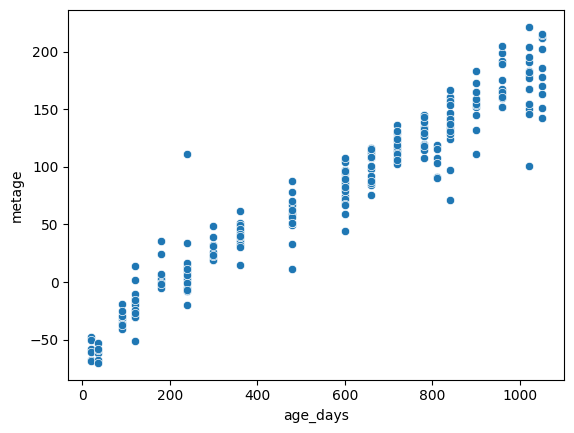

In [67]:
import seaborn as sns
sns.scatterplot(
    x="age_days",
    y="metage",
    data=metage_wmeta
)

In [68]:
from scipy.stats import pearsonr
pearsonr(metage_wmeta["age_days"], metage_wmeta["metage"])

(0.9660832166766897, 3.481432545828997e-150)

In [ ]:
metage_wmeta["metage"].var()

4930.989571221972

In [83]:
shared_idx = np.union1d([m["index"] for m in metlev_data])

TypeError: _union1d_dispatcher() missing 1 required positional argument: 'ar2'

In [91]:
metlev_data_merged = metlev_data.copy()

while (len(metlev_data_merged) > 1):
    # Define a function to merge two dataframes
    def merge_dfs(i, j):
        return pd.concat(
            [
                metlev_data_merged[i].set_index("index"),
                metlev_data_merged[j].set_index("index")
            ],
            join="outer"
        )
    # If there are an odd number of dataframes, merge the last dataframe with second to last
    if len(metlev_data_merged) % 2 == 1:
        metlev_data_merged[-2] = merge_dfs(metlev_data_merged[-2], metlev_data_merged[-1])
        metlev_data_merged = metlev_data_merged[:-1]
    # Split the list of dataframes into pairs and merge each pair in parallel
    with ProcessPoolExecutor() as executor:
        futures = []
        for i in range(0, len(metlev_data_merged), 2):
            futures.append(executor.submit(merge_dfs, i, i+1))
        # Wait for all futures to complete and merge the results
        metlev_data_merged = [future.result() for future in as_completed(futures)]
        executor.shutdown(wait=True)
    # Recursively merge the list of merged dataframes


NameError: name 'concurrent' is not defined

In [85]:
for i in range(0, len(metlev_data), 2):
    print(i, i+1)

0 1
2 3
4 5
6 7
8 9
10 11
12 13
14 15
16 17
18 19
20 21
22 23
24 25
26 27
28 29
30 31
32 33
34 35
36 37
38 39
40 41
42 43
44 45
46 47
48 49
50 51
52 53
54 55
56 57
58 59
60 61
62 63
64 65
66 67
68 69
70 71
72 73
74 75
76 77
78 79
80 81
82 83
84 85
86 87
88 89
90 91
92 93
94 95
96 97
98 99
100 101
102 103
104 105
106 107
108 109
110 111
112 113
114 115
116 117
118 119
120 121
122 123
124 125
126 127
128 129
130 131
132 133
134 135
136 137
138 139
140 141
142 143
144 145
146 147
148 149
150 151
152 153
154 155
156 157
158 159
160 161
162 163
164 165
166 167
168 169
170 171
172 173
174 175
176 177
178 179
180 181
182 183
184 185
186 187
188 189
190 191
192 193
194 195
196 197
198 199
200 201
202 203
204 205
206 207
208 209
210 211
212 213
214 215
216 217
218 219
220 221
222 223
224 225
226 227
228 229
230 231
232 233
234 235
236 237
238 239
240 241
242 243
244 245
246 247
248 249
250 251
252 253


In [99]:
metlev_data_merge = metlev_data[0].set_index("index").join(metlev_data[1].set_index("index"), how="outer")


In [107]:
metlev_data_merge

,SRR3440613_metlev,SRR3440930_metlev
index,,
10_100008285,100.0,100.000000
10_100008492,100.0,87.500000
10_100014336,100.0,NaN
10_100015516,0.0,36.363636
10_100015540,0.0,36.363636
...,...,...
JH584304.1_98147,NaN,100.000000
JH584304.1_99182,NaN,0.000000
JH584304.1_99194,NaN,100.000000


In [104]:
metage["metage2"] = metage["metage"] - metage["metage"].min()

In [105]:
metage[['metage', 'metage2']].var()

metage     5279.260626
metage2    5279.260626
dtype: float64

In [100]:

pca_data = metlev_data_merge
prop_nan = pca_data.isna().sum(axis=0) / pca_data.shape[0]
prop_nan

SRR3440613_metlev    0.136756
SRR3440930_metlev    0.078867
dtype: float64

In [102]:
prop_nan.rename("prop_nan").reset_index()

,index,prop_nan
0,SRR3440613_metlev,0.136756
1,SRR3440930_metlev,0.078867


In [113]:
metlev_data_merge

,SRR3440613_metlev,SRR3440930_metlev
index,,
10_100008285,100.0,100.000000
10_100008492,100.0,87.500000
10_100014336,100.0,NaN
10_100015516,0.0,36.363636
10_100015540,0.0,36.363636
...,...,...
JH584304.1_98147,NaN,100.000000
JH584304.1_99182,NaN,0.000000
JH584304.1_99194,NaN,100.000000


In [114]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca_data = metlev_data_merge
# prop_nan = pca_data.isna().sum(axis=0) / pca_data.shape[0]
# pca_data = pca_data.loc[:, prop_nan < 0.1]
pca_data.fillna(0, inplace=True)
# Perform PCA on metcov_data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_data.T)
pca = PCA(n_components=pca_data.shape[1])
pca_result = pca.fit_transform(scaled_data)


(3200925,)
(3200925,)


In [151]:
weights = meer_clock.set_index("index")["Weight"]
corrs = []
for i, pc in enumerate(pca.components_):
    pc = pd.Series(index=pca_data.index, data=pc)
    shared_weights = np.intersect1d(pc.index, weights.index)
    corrs.append(
        pd.Series(
            index=["pearsonr", "pval"],
            data=[*pearsonr(weights.loc[shared_weights], pc.loc[shared_weights])], 
            name=f"PC{i}"
        )
    )

In [121]:
pearsonr(pca.components_[0], )

array([-2.53130868e-13,  7.62090424e-04,  7.62090424e-04, ...,
       -7.62090424e-04, -7.62090424e-04, -7.62090424e-04])

In [ ]:
4930.989571221972 / 2771404.444444444

0.0017792385305243454

In [ ]:
pca.explained_variance_.sum()

2771404.444444444

In [106]:
pca.explained_variance_.sum()

NameError: name 'pca' is not defined

In [ ]:
pca.explained_variance_ / 2771404.444444444

array([5.10095371e-02, 4.27722997e-02, 2.97606664e-02, 2.49569620e-02,
       2.35591721e-02, 2.25145948e-02, 2.20904918e-02, 2.15826584e-02,
       2.12308210e-02, 2.04595865e-02, 1.87173750e-02, 1.81298134e-02,
       1.77160194e-02, 1.74192617e-02, 1.71837395e-02, 1.64270666e-02,
       1.58103888e-02, 1.53763966e-02, 1.52396570e-02, 1.51910214e-02,
       1.50495719e-02, 1.48123099e-02, 1.46240674e-02, 1.45194668e-02,
       1.42892443e-02, 1.38030533e-02, 1.32351931e-02, 1.31327820e-02,
       1.29165915e-02, 1.28607279e-02, 1.27409627e-02, 1.25137395e-02,
       1.23993651e-02, 1.22847863e-02, 1.22317198e-02, 1.21415895e-02,
       1.21048359e-02, 1.20036834e-02, 1.19802938e-02, 1.19173742e-02,
       1.18723246e-02, 1.15781399e-02, 1.15692668e-02, 1.09360250e-02,
       1.05870044e-02, 1.04742919e-02, 1.02818306e-02, 1.02576310e-02,
       9.99273681e-03, 9.93471644e-03, 9.73683252e-03, 9.66803026e-03,
       9.50474810e-03, 9.42988815e-03, 9.27986852e-03, 9.13691658e-03,
      

In [ ]:
pca.explained_variance_ratio_

array([5.10095371e-02, 4.27722997e-02, 2.97606664e-02, 2.49569620e-02,
       2.35591721e-02, 2.25145948e-02, 2.20904918e-02, 2.15826584e-02,
       2.12308210e-02, 2.04595865e-02, 1.87173750e-02, 1.81298134e-02,
       1.77160194e-02, 1.74192617e-02, 1.71837395e-02, 1.64270666e-02,
       1.58103888e-02, 1.53763966e-02, 1.52396570e-02, 1.51910214e-02,
       1.50495719e-02, 1.48123099e-02, 1.46240674e-02, 1.45194668e-02,
       1.42892443e-02, 1.38030533e-02, 1.32351931e-02, 1.31327820e-02,
       1.29165915e-02, 1.28607279e-02, 1.27409627e-02, 1.25137395e-02,
       1.23993651e-02, 1.22847863e-02, 1.22317198e-02, 1.21415895e-02,
       1.21048359e-02, 1.20036834e-02, 1.19802938e-02, 1.19173742e-02,
       1.18723246e-02, 1.15781399e-02, 1.15692668e-02, 1.09360250e-02,
       1.05870044e-02, 1.04742919e-02, 1.02818306e-02, 1.02576310e-02,
       9.99273681e-03, 9.93471644e-03, 9.73683252e-03, 9.66803026e-03,
       9.50474810e-03, 9.42988815e-03, 9.27986852e-03, 9.13691658e-03,
      

In [ ]:
pca_result = pd.DataFrame(pca_result, index = pca_data.T.index, columns = ["PC" + str(i) for i in range(1,pca_result.shape[1]+1)])
pca_result

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73
SRR3440613_metlev,-262.408113,-413.674826,2013.847646,573.965920,-347.464204,-689.697487,-166.365705,-192.979877,384.532263,190.643324,...,6.579431,-11.823651,-21.454788,13.132559,-6.521980,-4.397627,-6.752500,-1.287011,-4.116773,2.583807e-12
SRR3440930_metlev,1963.857279,-217.772207,106.180697,138.824346,-89.057465,514.137364,-589.598445,-425.003328,16.209816,-66.237627,...,-2.039145,-0.658912,-4.972911,-10.124094,2.853359,1.779190,5.189270,8.197584,2.415196,2.583807e-12
SRR3440795_metlev,-45.536795,-104.733265,-40.805849,-38.535018,9.451380,-29.334823,-33.703751,25.547910,50.094421,-24.596749,...,90.516570,-46.951874,-70.308705,-38.220554,10.787070,-98.186091,6.450798,12.909443,-15.752688,2.583807e-12
SRR3440793_metlev,-25.949691,-35.905777,-66.272664,-51.185957,0.569537,-29.592108,34.065877,-62.592423,5.841820,-21.887364,...,57.489813,8.538418,-42.628350,-37.569105,16.963036,-30.322612,11.033583,0.681316,-2.701613,2.583807e-12
SRR3440837_metlev,-128.496965,-19.318574,-90.997605,-65.935257,-11.983251,-28.771746,-56.357586,-70.679156,-18.479697,-23.358563,...,3.067471,0.157134,12.650465,19.567172,-20.136879,-7.913155,-12.458034,6.655017,0.069206,2.583807e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR3440907_metlev,511.976787,-153.512106,-65.446011,-103.331787,9.448496,-250.184044,148.612849,179.188333,42.996604,19.485158,...,-10.730269,2.292879,2.689808,-8.875677,-6.680188,6.097730,0.635515,7.105905,4.456690,2.583807e-12
SRR3440836_metlev,31.644272,-103.867317,-64.684164,-75.391389,18.438464,-96.950296,-37.989834,25.779267,-18.727746,-3.671318,...,-5.651005,-5.875243,-15.781709,-10.794573,3.560144,1.256079,-7.304051,-13.533695,2.175075,2.583807e-12
SRR3440576_metlev,-197.182424,-106.854911,15.008055,-45.293371,-32.647302,107.125518,-111.459870,162.637480,157.266600,7.402859,...,-68.781793,-113.743873,-39.639529,42.923045,-68.992639,-129.426449,-29.245894,-93.939615,-21.324729,2.583807e-12
SRR3440871_metlev,-70.611772,97.737081,-237.766894,194.421334,-114.348717,-322.961883,-148.220790,-194.287303,15.275542,-66.578608,...,21.547773,2.300759,-8.782329,6.423791,-23.997980,-12.561681,-7.871361,2.723073,-2.733121,2.583807e-12


In [ ]:
pca_result["run"] = pca_result.index.to_series().str.split("_", expand=True)[0]
pca_result

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,run
SRR3440613_metlev,-262.408113,-413.674826,2013.847646,573.965920,-347.464204,-689.697487,-166.365705,-192.979877,384.532263,190.643324,...,-11.823651,-21.454788,13.132559,-6.521980,-4.397627,-6.752500,-1.287011,-4.116773,2.583807e-12,SRR3440613
SRR3440930_metlev,1963.857279,-217.772207,106.180697,138.824346,-89.057465,514.137364,-589.598445,-425.003328,16.209816,-66.237627,...,-0.658912,-4.972911,-10.124094,2.853359,1.779190,5.189270,8.197584,2.415196,2.583807e-12,SRR3440930
SRR3440795_metlev,-45.536795,-104.733265,-40.805849,-38.535018,9.451380,-29.334823,-33.703751,25.547910,50.094421,-24.596749,...,-46.951874,-70.308705,-38.220554,10.787070,-98.186091,6.450798,12.909443,-15.752688,2.583807e-12,SRR3440795
SRR3440793_metlev,-25.949691,-35.905777,-66.272664,-51.185957,0.569537,-29.592108,34.065877,-62.592423,5.841820,-21.887364,...,8.538418,-42.628350,-37.569105,16.963036,-30.322612,11.033583,0.681316,-2.701613,2.583807e-12,SRR3440793
SRR3440837_metlev,-128.496965,-19.318574,-90.997605,-65.935257,-11.983251,-28.771746,-56.357586,-70.679156,-18.479697,-23.358563,...,0.157134,12.650465,19.567172,-20.136879,-7.913155,-12.458034,6.655017,0.069206,2.583807e-12,SRR3440837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR3440907_metlev,511.976787,-153.512106,-65.446011,-103.331787,9.448496,-250.184044,148.612849,179.188333,42.996604,19.485158,...,2.292879,2.689808,-8.875677,-6.680188,6.097730,0.635515,7.105905,4.456690,2.583807e-12,SRR3440907
SRR3440836_metlev,31.644272,-103.867317,-64.684164,-75.391389,18.438464,-96.950296,-37.989834,25.779267,-18.727746,-3.671318,...,-5.875243,-15.781709,-10.794573,3.560144,1.256079,-7.304051,-13.533695,2.175075,2.583807e-12,SRR3440836
SRR3440576_metlev,-197.182424,-106.854911,15.008055,-45.293371,-32.647302,107.125518,-111.459870,162.637480,157.266600,7.402859,...,-113.743873,-39.639529,42.923045,-68.992639,-129.426449,-29.245894,-93.939615,-21.324729,2.583807e-12,SRR3440576
SRR3440871_metlev,-70.611772,97.737081,-237.766894,194.421334,-114.348717,-322.961883,-148.220790,-194.287303,15.275542,-66.578608,...,2.300759,-8.782329,6.423791,-23.997980,-12.561681,-7.871361,2.723073,-2.733121,2.583807e-12,SRR3440871


In [ ]:
pca_wmeta = pd.merge(metage_wmeta, pca_result, on="run", how="inner")

In [ ]:
pca_wmeta.loc[:,pca_wmeta.columns.str.contains("PC")]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73
0,-139.908212,-179.435787,63.089244,-53.856149,9.607820,218.974007,-71.173921,270.758554,255.163941,40.128678,...,3.873773,-2.157370,-22.356906,-42.770209,45.024843,-43.007123,4.692711,-21.552134,-5.943307,2.583807e-12
1,-260.663515,-157.752736,-34.858427,-2.000918,-70.490640,788.573388,-449.904668,1069.385314,1246.006665,177.773946,...,-7.031959,-0.922271,7.475163,3.081306,-2.646016,-2.546462,2.882333,-5.050354,-0.086747,2.583807e-12
2,-197.182424,-106.854911,15.008055,-45.293371,-32.647302,107.125518,-111.459870,162.637480,157.266600,7.402859,...,-68.781793,-113.743873,-39.639529,42.923045,-68.992639,-129.426449,-29.245894,-93.939615,-21.324729,2.583807e-12
3,-156.503424,-332.235782,412.942655,-59.638612,187.801312,531.524397,310.357635,66.897666,-433.258948,-147.918093,...,-7.342845,7.665094,4.479845,-2.722632,10.203594,2.433313,4.521686,3.964373,-1.668879,2.583807e-12
4,-149.210411,-288.161273,369.335708,-59.886852,129.120525,357.822361,195.807445,55.595067,-268.112092,-96.961852,...,12.452661,-24.072475,-30.953627,-26.553983,9.407722,-23.592245,1.074555,-4.085929,-1.076247,2.583807e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,50.538713,-111.388962,-68.440800,-111.757285,189.408467,37.961285,97.330977,-91.454756,-31.784784,107.614331,...,2.131442,-2.212117,-1.406762,-9.470738,11.182544,0.008821,2.174630,-0.731459,0.998855,2.583807e-12
69,-31.446599,-47.251528,-44.985294,-59.237785,41.476670,-14.283547,-0.155224,-33.802801,7.245145,12.500007,...,78.644279,-44.219273,3.886283,-32.642592,-19.171582,-69.433220,-29.635286,15.286145,-7.817766,2.583807e-12
70,185.764924,-103.566051,-26.952121,-46.747728,54.624633,-41.615356,63.507713,2.634799,30.512995,6.654043,...,21.988745,-4.546226,-24.754806,-38.631502,22.468296,-27.209450,1.565919,20.737088,-2.886214,2.583807e-12
71,1963.857279,-217.772207,106.180697,138.824346,-89.057465,514.137364,-589.598445,-425.003328,16.209816,-66.237627,...,-2.039145,-0.658912,-4.972911,-10.124094,2.853359,1.779190,5.189270,8.197584,2.415196,2.583807e-12


In [ ]:
pca_wmeta.loc[:,pca_wmeta.columns.str.contains("PC")].fillna(0).corrwith(pca_wmeta["metage"].astype(float)).sort_values()

PC8    -0.299575
PC19   -0.281656
PC9    -0.260922
PC26   -0.256665
PC6    -0.228698
          ...   
PC20    0.145512
PC16    0.176042
PC5     0.235840
PC18    0.253172
PC1     0.512961
Length: 73, dtype: float64

<AxesSubplot:xlabel='PC1', ylabel='metage'>

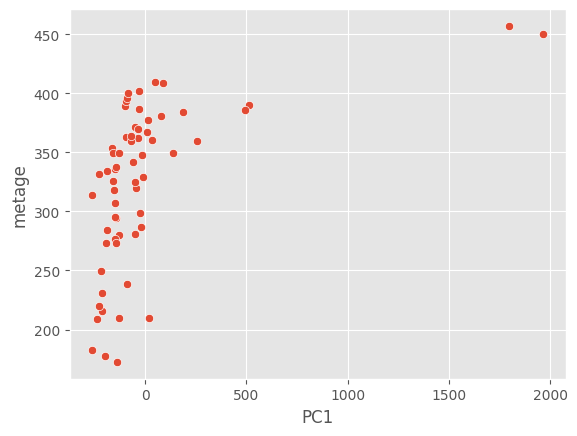

In [ ]:
import seaborn as sns
sns.scatterplot(
    x="PC1",
    y="metage",
    data=pca_wmeta
)

<AxesSubplot:xlabel='PC2', ylabel='age'>

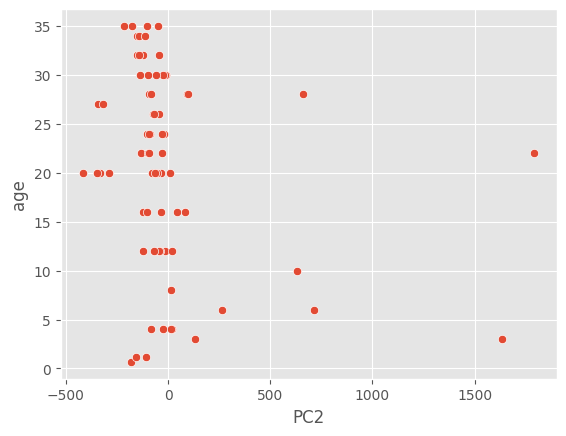

In [ ]:
sns.scatterplot(
    x="PC2",
    y="age",
    data=pca_wmeta
)

In [ ]:
all_meta

,geo_accession,sample name,run,assay type,avgspotlen,bases,bioproject,biosample,bytes,center name,...,sra study,strain,tissue,geo_accession (exp),strain/condition,age,sex,aligned pe reads,prepared for sequencing,used in subset 1/2
0,GSM2132712,20D02,SRR3440565,Bisulfite-Seq,150,5077961400,PRJNA319643,SAMN04902251,2535396174,GEO,...,SRP073930,C57BL/6,whole blood,GSM2132712,C57BL/6_NIA/BWH,0.67,Male,22860348,D.A. Petkovich,NaN
1,GSM2132713,20D03,SRR3440566,Bisulfite-Seq,150,5574276150,PRJNA319643,SAMN04902252,2777080295,GEO,...,SRP073930,C57BL/6,whole blood,GSM2132713,C57BL/6_NIA/BWH,0.67,Male,24139755,D.A. Petkovich,NaN
2,GSM2132714,20D04,SRR3440567,Bisulfite-Seq,150,5852789850,PRJNA319643,SAMN04902253,2925011299,GEO,...,SRP073930,C57BL/6,whole blood,GSM2132714,C57BL/6_NIA/BWH,0.67,Male,26017532,D.A. Petkovich,NaN
3,GSM2132715,20D05,SRR3440568,Bisulfite-Seq,150,6069354450,PRJNA319643,SAMN04902254,3030737146,GEO,...,SRP073930,C57BL/6,whole blood,GSM2132715,C57BL/6_NIA/BWH,0.67,Male,26465141,D.A. Petkovich,NaN
4,GSM2132716,20D06,SRR3440569,Bisulfite-Seq,150,5059694850,PRJNA319643,SAMN04902255,2504613920,GEO,...,SRP073930,C57BL/6,whole blood,GSM2132716,C57BL/6_NIA/BWH,0.67,Male,22587003,D.A. Petkovich,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,GSM2132958,M3502R,SRR3440928,Bisulfite-Seq,150,996221550,PRJNA319643,SAMN04902315,447043487,GEO,...,SRP073930,C57BL/6,whole blood,GSM2132958,C57BL/6,35,Male,15911915,D.A. Petkovich,1.0
250,GSM2132958,M3502R,SRR3440929,Bisulfite-Seq,150,2380795500,PRJNA319643,SAMN04902315,997426868,GEO,...,SRP073930,C57BL/6,whole blood,GSM2132958,C57BL/6,35,Male,15911915,D.A. Petkovich,1.0
251,GSM2132959,M3503,SRR3440930,Bisulfite-Seq,150,1953852450,PRJNA319643,SAMN04902316,817629463,GEO,...,SRP073930,C57BL/6,whole blood,GSM2132959,C57BL/6,35,Male,21414583,D.A. Petkovich,1.0
252,GSM2132959,M3503,SRR3440931,Bisulfite-Seq,150,2852108550,PRJNA319643,SAMN04902316,1324293747,GEO,...,SRP073930,C57BL/6,whole blood,GSM2132959,C57BL/6,35,Male,21414583,D.A. Petkovich,1.0


In [ ]:
pca_data

,SRR3440613_metlev,SRR3440930_metlev,SRR3440795_metlev,SRR3440793_metlev,SRR3440837_metlev,SRR3440607_metlev,SRR3440847_metlev,SRR3440897_metlev,SRR3440823_metlev,SRR3440728_metlev,...,SRR3440619_metlev,SRR3440774_metlev,SRR3440821_metlev,SRR3440865_metlev,SRR3440784_metlev,SRR3440907_metlev,SRR3440836_metlev,SRR3440576_metlev,SRR3440871_metlev,SRR3440569_metlev
index,,,,,,,,,,,,,,,,,,,,,
1_3014929,100.000000,0.000000,100.000000,100.000000,0.000000,0.000000,100.000000,66.666667,100.000000,0.0,...,0.000000,100.000000,0.000000,66.666667,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1_3014975,100.000000,0.000000,100.000000,100.000000,0.000000,0.000000,100.000000,100.000000,100.000000,0.0,...,0.000000,100.000000,0.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1_3020689,88.888889,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,100.000000,0.0,...,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1_3020690,80.000000,0.000000,0.000000,0.000000,0.000000,80.000000,0.000000,0.000000,0.000000,0.0,...,88.235294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000
1_3020724,100.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,100.000000,0.0,...,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9_124485215,50.000000,0.000000,50.000000,100.000000,100.000000,100.000000,100.000000,83.333333,100.000000,100.0,...,100.000000,100.000000,0.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,87.500000
9_124489952,83.333333,100.000000,90.322581,91.176471,88.888889,80.000000,96.000000,75.000000,92.500000,100.0,...,100.000000,86.666667,100.000000,100.000000,87.500000,100.000000,94.736842,93.333333,95.454545,73.529412
9_124490026,83.333333,86.956522,90.322581,100.000000,83.333333,100.000000,100.000000,68.750000,100.000000,100.0,...,100.000000,100.000000,100.000000,94.444444,93.750000,96.551724,100.000000,93.333333,90.909091,91.176471


In [ ]:
metcov_data

In [ ]:
data1

,chr,index,coverage,metlev
0,NC_000067.6,NC_000067.6_3014929,1,100.0
1,NC_000067.6,NC_000067.6_3014975,1,100.0
2,NC_000067.6,NC_000067.6_3020815,3,100.0
3,NC_000067.6,NC_000067.6_3020843,3,100.0
4,NC_000067.6,NC_000067.6_3020877,8,87.5
...,...,...,...,...
2624982,NW_004450263.1,NW_004450263.1_914480,1,100.0
2624983,NW_004450263.1,NW_004450263.1_989128,1,100.0
2624984,NW_004450263.1,NW_004450263.1_989136,1,100.0
2624985,NW_004450263.1,NW_004450263.1_989138,1,100.0


In [ ]:

df[1].unique()

array(['000067.6', '000068.7', '000069.6', '000070.6', '000071.6',
       '000072.6', '000073.6', '000074.6', '000075.6', '000076.6',
       '000077.6', '000078.6', '000079.6', '000080.6', '000081.6',
       '000082.6', '000083.6', '000084.6', '000085.6', '000086.7',
       '000087.7', '005089.1', '039198.1', '039247.2', '039248.1',
       '039256.1', '039257.4', '039291.1', '039292.1', '039296.1',
       '039334.1', '039372.2', '039373.1', '039469.1', '039470.1',
       '039593.1', '039614.1', '039630.5', '039634.4', '039666.2',
       '039739.2', '078651.1', '078683.1', '080256.1', '080257.1',
       '095534.1', '096797.1', '109318.2', '109599.1', '111920.1',
       '114257.4', '114985.3', '114988.1', '162750.1', '165789.2',
       '166280.1', '166281.1', '166282.1', '166287.2', '166291.1',
       '166294.1', '166295.1', '166299.2', '166305.2', '166317.2',
       '166338.1', '166394.1', '166396.1', '166397.1', '166398.1',
       '166438.1', '166443.1', '166444.1', '166450.1', '166451

In [ ]:
idx = pd.read_csv(f"{results_folder}/metcov_selected_sites/all_sites_methylationidx.csv", header=None)
idx[1]

0            1_3014929
1            1_3014975
2            1_3020689
3            1_3020690
4            1_3020724
              ...     
2761491    9_124485215
2761492    9_124489952
2761493    9_124490026
2761494    9_124490027
2761495    9_124490068
Name: 1, Length: 2761496, dtype: object

In [ ]:
metcov_data["index"] = idx[1]

In [ ]:
chrom_pos = metcov_data["index"].str.split("_", expand=True)
chrom_pos.columns = ["chr", "position"]
chrom_pos

,chr,position
0,1,3014929
1,1,3014975
2,1,3020689
3,1,3020690
4,1,3020724
...,...,...
2761491,9,124485215
2761492,9,124489952
2761493,9,124490026
2761494,9,124490027


In [ ]:
chrom_pos = metcov_data["index"].str.split("_", expand=True)
chrom_pos.columns = ["chr", "position"]
chrom_pos.drop(chrom_pos.index[chrom_pos["chr"].str.contains("JH|GL")], inplace=True)
chrom_pos = chrom_pos.astype(int)
metcov_data1 = pd.concat([chrom_pos, metcov_data], axis=1).dropna(how="any")

In [ ]:
pet_clock["index"] = pet_clock[["chr", "position"]].astype(str).apply(lambda x: "_".join(x), axis=1)

In [ ]:
shared = np.intersect1d(pet_clock["index"], metcov_data["index"])

In [ ]:
shared.shape

(71,)

In [ ]:
pd.merge(pet_clock, metcov_data1, on=["chr", "position"], how="inner")

,Chromosome,position,UCSC Refgene name,Located within,Relation to CpG Island,Predicted Element,Methylation Age Correlation,Weight,chr,index,...,SRR3440923_metlev,SRR3440774_metlev,SRR3440865_metlev,SRR3440784_metlev,SRR3440772_metlev,SRR3440907_metlev,SRR3440619_metlev,SRR3440871_metlev,SRR3440576_metlev,SRR3440569_metlev
0,chr13,60687074,Dapk1,gene,-,-,Negative,-0.028440,13,13_60687074,...,26.785714,51.851852,26.470588,52.173913,35.714286,52.777778,42.857143,27.777778,75.000000,83.333333
1,chr12,103214653,Prima1,gene,-,-,Negative,-0.130210,12,12_103214653,...,70.175439,84.848485,55.172414,83.783784,77.586207,82.857143,53.333333,71.428571,83.333333,82.142857
2,chr11,82930770,Unc45bos,gene,N_Shore,-,Positive,0.016052,11,11_82930770,...,58.974359,23.529412,33.333333,22.222222,22.580645,68.421053,43.478261,27.586207,4.444444,31.578947
3,chr11,82930778,Unc45bos,gene,N_Shore,-,Positive,0.133055,11,11_82930778,...,35.897436,11.764706,14.814815,16.666667,9.677419,31.578947,26.086957,10.344828,0.000000,5.263158
4,chr11,82931327,Unc45bos,gene,Island,-,Positive,0.122300,11,11_82931327,...,14.634146,8.888889,12.903226,22.727273,15.384615,39.393939,10.714286,14.814815,1.052632,2.380952
5,chr6,31218979,-,-,S_Shore,Promoter,Negative,-0.049875,6,6_31218979,...,18.032787,30.769231,18.518519,26.923077,33.333333,15.000000,21.875000,35.714286,73.033708,50.617284
6,chr5,146461730,Wasf3,gene,-,-,Negative,-0.045852,5,5_146461730,...,10.869565,14.285714,16.216216,35.000000,20.370370,38.461538,26.086957,24.000000,73.333333,72.727273


In [ ]:
pet_clock = pd.read_excel(f"{root_folder}/clock_weights_NIHMS863021-supplement-4.xlsx", header=3)
pet_clock["chr"] = pet_clock["Chromosome"].str.replace("chr","").astype(int)
pet_clock.rename(columns={"Position":"position"}, inplace=True)

In [ ]:
chrom_pos
# ____

# # Making clock

# In[37]:

current_random_state = 23
current_n_folds = 10
current_regression_alpha = [100]
current_regression_l1_ratio = [0.6]

################################
from sklearn.model_selection import train_test_split

(X_train, 
 X_test, 
 y_train, y_test) = train_test_split(metlev, ageslist, 
                                     test_size=0.2, 
                                     random_state=current_random_state,stratify=tissueslist)
################################

cv = model_selection.StratifiedKFold(y_train, n_folds = current_n_folds, shuffle = False, random_state = 23)
################################

#scaler = StandardScaler()
pensf_regressor = linear_model.ElasticNet(random_state=23)
pensf_pipeline = Pipeline(steps = [('regression', pensf_regressor)])
#pensf_pipeline.get_params()
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = False)
################################

parameters_grid = {
    'regression__alpha' : current_regression_alpha,
    #'regression__epsilon': [0.01,0.1,0.5],
    'regression__l1_ratio': current_regression_l1_ratio,
}  
################################

grid_pensf = model_selection.GridSearchCV(pensf_pipeline,parameters_grid,cv=cv,scoring=scorer,n_jobs=10)
################################



# In[38]:

grid_pensf.fit(X_train,y_train)
################################



# In[39]:

print(np.sum(grid_pensf.best_estimator_.named_steps['regression'].coef_!=0))
print(metrics.mean_absolute_error(y_test, grid_pensf.predict(X_test)))
print(metrics.mean_absolute_error(y_train, grid_pensf.predict(X_train)))
print(grid_pensf.best_params_)


# In[ ]:

y_true = y_train
y_pred = grid_pensf.best_estimator_.predict(X_train)
print(sklearn.metrics.r2_score(y_true, y_pred))


# In[ ]:

y_true = y_test
y_pred = grid_pensf.best_estimator_.predict(X_test)
print(sklearn.metrics.r2_score(y_true, y_pred))


# # Getting positions and weights

# In[77]:

potential_sites = grid_pensf.best_estimator_.named_steps['regression'].coef_
pos_number = []
weight = []
for i in range(len(potential_sites)):
    if potential_sites[i] != 0:
        pos_number.append(i)
        weight.append(potential_sites[i])

clock_positions = []
for i in range(len(wid_list)):
    if i in pos_number:
        clock_positions.append(wid_list[i])
        


# In[82]:

clock435 = pd.DataFrame()
clock435['index'] = clock_positions
clock435['weight'] = weight
clock435.head(10)


# In[ ]:

clock435.to_csv(WLMT_clock)



NameError: name 'metlev' is not defined

In [ ]:

# In[3]:

meta_infile = pd.read_csv(metadata_file)
metadata = pd.DataFrame(meta_infile)
metadata.head()


# In[4]:

agescorresp = {}
tissuecorresp = {}
treatmentcorresp = {}
idcorresp = {}
for i in range(len(metadata)):
    agescorresp[metadata.ix[i,'ID']] = metadata.ix[i,'Age']
    tissuecorresp[metadata.ix[i,'ID']] = metadata.ix[i,'Tissue']  
    treatmentcorresp[metadata.ix[i,'ID']] = metadata.ix[i,'Treatment']
    idcorresp[metadata.ix[i,'ID']] = metadata.ix[i,'ID']


# ## Remove lib20 and samples with age which is not exact ("42-56")

# In[23]:

lib20 = ['Lu3003','Lu0603','L1207','Br3008','Lu1203','H0607']


# In[24]:

normals_list = []
for i in range(len(metadata)):
    if metadata.ix[i,'Treatment'] == 'Normal': # or metadata.ix[i,'Treatment'] == 'Untreated':
        if metadata.ix[i,'ID'] not in lib20:
            #print(metadata.ix[i,'ID'])
            if metadata.ix[i,'Age'] != '42-56':
                normals_list.append(metadata.ix[i,'ID'])


# In[26]:

ageslist = []
tissueslist = []
treatmentlist = []
drop_list = []
count = 0
with open('622_f2t7.list') as inlist:
    for line in inlist:  
        #print(line.split('/')[1].replace('.metcov.gz\n',''))
        if line.split('/')[1].replace('.metcov.gz\n','') in normals_list:
            ageslist.append(agescorresp[line.split('/')[1].replace('.metcov.gz\n','')])
            tissueslist.append(tissuecorresp[line.split('/')[1].replace('.metcov.gz\n','')])
            treatmentlist.append(treatmentcorresp[line.split('/')[1].replace('.metcov.gz\n','')])
        else:
            drop_list.append(count)
        count += 1 
print(count)        


# In[27]:

ageslist585 = []
idlist585 = []
with open('622_f2t7.list') as inlist:
    for line in inlist: 
        ageslist585.append(agescorresp[line.split('/')[1].replace('.metcov.gz\n','')])
        idlist585.append(idcorresp[line.split('/')[1].replace('.metcov.gz\n','')])


# In[28]:

#idlist585


# In[29]:

for i in range(len(ageslist585)):
    if ageslist585[i] == '42-56':
        print(ageslist585[i])
        ageslist585[i] = 48


# In[30]:

len(ageslist585)


# In[32]:

ageslist = list(map(int, ageslist))


# In[33]:

inf_metlev_wid = pd.read_table('f2t7_autosomes_labeled.metlev.5_90.tab')
# This file contains methylation level for the sites with good coverage and are located only on autosomes
# each site is labeled with an ID


# In[34]:

metlev_wid = pd.DataFrame(inf_metlev_wid)


# In[35]:

metlev_wid.head()


# In[36]:

wid_list = list(metlev_wid)
print(len(wid_list))


# In[37]:

all_positions = wid_list


# In[38]:

print(len(all_positions))


# In[ ]:

inf_metlev = pd.read_table('f2t7_autosomes.metlev.5_90.tab', header = None) 
# This file contains methylation level for the sites with good coverage and are located only on autosomes
# Sites columns are not labeled


# In[ ]:

metlev585 = pd.DataFrame(inf_metlev)


# In[ ]:

metlev585.shape


# In[ ]:

metlev = pd.DataFrame(inf_metlev)
print(len(metlev))
metlev.shape


# In[ ]:

metlev.head()


# In[ ]:

sum(metlev.isnull().any())


# ## Filtering for Normal/untreated

# In[22]:

temp_metlev = metlev
metlev_normal = temp_metlev.drop(drop_list, axis = 0)
print(metlev_normal.shape)
metlev = metlev_normal


# In[32]:

metlev.head()

